# Analysis of tips.csv dataset - WORK IN PROGRESS
Data analysis of the tips.csv dataset in completion of Module 52446 "Fundamentals of Data Analysis", Higher Diploma in Data Analytics, Galway-Mayo Institute of Technology

## What is in this document


## Layout of document
Each section will start with data analysis and results, followed by a textual description and interpretation of findings.

## Prepare dataset and analysis packages

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import tips.csv dataset
df = pd.read_csv('tips.csv')

## Evaluate dataset congruency
Before conducting analysis on the dataset, it is worth determining if the dataset is complete and recorded correctly as follows:

In [3]:
# Identify column titles and first 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Confirm that data correctly recorded by comparing head to tail
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


It appears that all data is entered correctly, as there does not appear to be non-sensical entries in the last 5 observations.

In [5]:
# Check across data variables for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There does not appear to be any missing values within the dataset. That is not to say that all values entered are sensical in nature (e.g. party size of 1,000 is a valid entry, but likely incorrect). It's worth getting some basic descriptive statistics to see if the data makes sense.

## Descriptive Statistics

In [6]:
# Reveal some basic descriptive statistics of each data column
for col in df:
    print("Descriptive statistics for variable: {}".format(col))
    print(df[col].describe())
    print()

Descriptive statistics for variable: total_bill
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Descriptive statistics for variable: tip
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Descriptive statistics for variable: sex
count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

Descriptive statistics for variable: smoker
count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

Descriptive statistics for variable: day
count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

Descriptive statistics for variable: time
count        244
unique         2
top       Dinner
freq         176
Name: time, dtype: object

Descriptive st

In [7]:
# Determine gender proportions

# Split the sample by gender using groupby function
gender = df.groupby('sex').size()

# Calculate the proportion of males
propmale = round((gender['Male']/(gender['Female']+gender['Male']))*100, 2)

# Print proportion of males
print(f"Proportion of sample that are male: {propmale}%")

# Calculate and print proportion of females from above results
print(f"Proportion of sample that are female: {100 - propmale}%")

Proportion of sample that are male: 64.34%
Proportion of sample that are female: 35.66%


In [8]:
# Determine proportion of smokers in sample

# Split the sample by smoking status using groupby function
smokers = df.groupby('smoker').size()

# Calculate the proportion of smokers
propsmoker = round((smokers['Yes']/(smokers['No']+smokers['Yes']))*100, 2)

# Print proportion of smokers
print(f"Proportion of sample that are smokers: {propsmoker}%")

# Calculate and print proportion of non-smokers from above results
print(f"Proportion of sample that are non-smokers: {100 - propsmoker}%")

Proportion of sample that are smokers: 38.11%
Proportion of sample that are non-smokers: 61.89%


The basic descriptive statistics appear sensical. It may help to plot the continuous data to appreciate the distribution profile for further analysis.

## Distribution plots of continuous variables
The continuous variables that are plotted below are as follows:
* total_bill
* tip

Text(0.5, 1.0, 'Histogram of Total Bill')

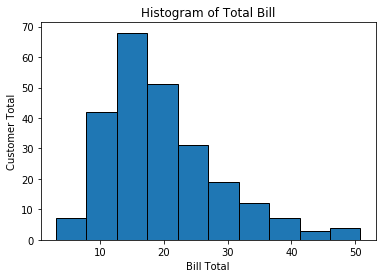

In [9]:
# Plot the distribution of total_bill
plt.hist('total_bill', edgecolor='k', data=df) # https://stackoverflow.com/a/42741774
plt.xlabel("Bill Total")
plt.ylabel("Customer Total")
plt.title("Histogram of Total Bill")

The total_bill distribution appears skewed to the right. This was evident from the basic descriptive statistics above, which indicated a different mean and median, and that 25% of payers paid more than $24 for their meal.

Text(0.5, 1.0, 'Histogram of Tip')

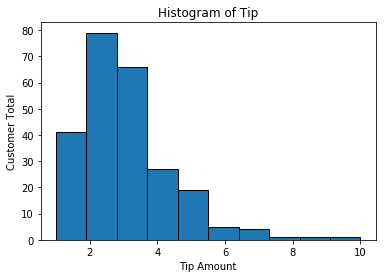

In [10]:
# Plot the distribution of tip
plt.hist('tip', edgecolor='k', data=df) 
plt.xlabel("Tip Amount")
plt.ylabel("Customer Total")
plt.title("Histogram of Tip")

Like total_bill, tip also appears positively skewed. This is to be expected from the descriptive stats above, but might also be related to the fact that tip is often tied to total bill amount (10% of total bill is often customary). We can explore whether such an association exists through a scatterplot:

Text(0.5, 1.0, 'Scatterplot of total_bill to tip')

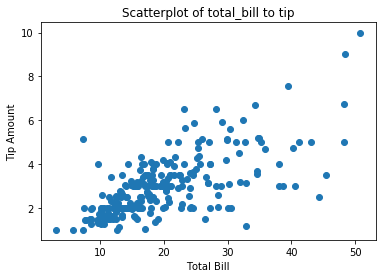

In [11]:
# Scatterplot of association between total_bill and tip
plt.scatter('total_bill', 'tip', data=df)
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Scatterplot of total_bill to tip")

It does indeed appear that there might be a linear relationship between total_bill and tip. We will determine what that relationship might be in the 'Regression' section below.

## Regression Analysis

We can begin by determining if there is a correlation between tip and total_bill. The [assumptions][1] of using a Pearson correlation coeffecient hold true here:
1. Continuous variables
2. Linear relationship as indicated by the scatterplot above
3. No significant outliers as indicated by the histograms and descriptive statistics above
4. Relatively normal distribution as indicated by the histogram

[1]: https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php

In [12]:
# Create df with total_bill and tip only
x = df[['total_bill', 'tip']]

# Determine Pearson coeffecient
x.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


A Pearson coeffecient of 0.68 [indicates][1] a large positive assocation between total_bill and tip. Next, we can determine the size of that relationship with a regression analysis.

[1]: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

In [53]:
# Compute regression line of best fit
reg = np.polyfit(df['total_bill'], df['tip'], 1)
m = reg[0]
c = reg[1]
print(f"""The slope of the regression line is {m:.2f}, and the intercept is {c:.2f}. 
That is, for every $1 increase in bill total, there is a commensurate ${m:.2f} increase in the tip amount""")

The slope of the regression line is 0.11, and the intercept is 0.92. 
That is, for every $1 increase in bill total, there is a commensurate $0.11 increase in the tip amount


Text(0, 0.5, 'Tip amount')

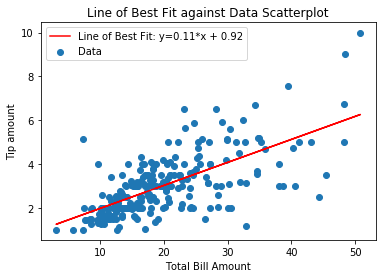

In [54]:
# Plot regression line to scatterplot
plt.scatter('total_bill', 'tip', data=df, label='Data')
plt.plot(df['total_bill'], df['total_bill'] * m + c, 'r', label=f'Line of Best Fit: y={m:.2f}*x + {c:.2f}')

# Add plot details
plt.legend()
plt.title("Line of Best Fit against Data Scatterplot")
plt.xlabel("Total Bill Amount")
plt.ylabel("Tip amount")

We can use the best fit line equation to calculate the likely tip from a given total bill amount.

In [62]:
# Extract random total_bill and corresponding tip amount from dataset
test = df.loc[np.random.randint(len(df)), ['total_bill', 'tip']]
bill = test[0]
realtip = test[1]

print(f'The random total_bill from the dataset is {bill} and the corresponding tip is {realtip}')

The random total_bill from the dataset is 16.47 and the corresponding tip is 3.23


In [63]:
# Calculate the tip using the above total_bill amount and applying it to the regression equation
# print(reg[0])
# print(test[0])
calctip = m * bill + c
print(f'''The tip amount according to the regression equation is {calctip:.2f}. This is a difference of {(realtip - calctip):.2f}. (Actual = {test[1]})''')

The tip amount according to the regression equation is 2.65. This is a difference of 0.58. (Actual = 3.23)


We can run the above random extraction and comparison of the regression value against the actual value several times and estimate how often the regression equation is correct.

In [70]:
# Create a list of tuples (actual tip amount, calculated tip amount) from 1,000 tries
compar = []
for i in range(1000):
    actualdf = df.loc[np.random.randint(len(df)), ['total_bill', 'tip']]
    # print(actualdf)
    realtip = actualdf[1]
    # print("Actual tip: ", realtip)
    calctip = round(m * realtip + c, 2)
    compar.append((realtip, calctip))

In [71]:
# Import this list into a dataframe for analysis
compardf = pd.DataFrame(compar, columns=['Actual', 'Calculated'])

# Confirm that dataframe correctly created
print(compardf.head())
print(compardf.tail())

   Actual  Calculated
0    2.00        1.13
1    3.15        1.25
2    3.00        1.24
3    2.00        1.13
4    2.31        1.16
     Actual  Calculated
995    3.50        1.29
996    5.00        1.45
997    3.00        1.24
998    1.64        1.09
999    2.50        1.18


In [72]:
# Determine the mean of the two columns
compardf.mean()

Actual        3.01571
Calculated    1.23751
dtype: float64

We can see that the mean of the actual tip is much larger than the mean of the tips calculated from the regression equation. This is also evident in the following plot:

Text(0.5, 1.0, 'Histogram of actual tips versus tips calculated from regression equation')

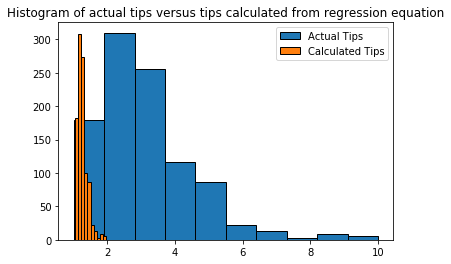

In [74]:
# Plot a histrogram of the two distributions
plt.hist(compardf['Actual'], edgecolor='k', label='Actual Tips')
plt.hist(compardf['Calculated'], edgecolor='k', label='Calculated Tips')

# Add plot details
plt.legend()
plt.title("Histogram of actual tips versus tips calculated from regression equation")

This indicates that although a regression equation can offer us some understanding of what the size of the relationship between two variables is, it is not necessarily deterministic, and is only a 'Best Fit'. 

In [75]:
df.sem()

total_bill    0.569919
tip           0.088578
size          0.060888
perc          0.390962
dtype: float64

In [20]:
# Compare descriptive statistics across gender - Male
round(df.loc[df.loc[: , 'sex'] == 'Male'].describe(),2)

,total_bill,tip,size
count,157.00,157.00,157.00
mean,20.74,3.09,2.63
std,9.25,1.49,0.96
min,7.25,1.00,1.00
25%,14.00,2.00,2.00
50%,18.35,3.00,2.00
75%,24.71,3.76,3.00
max,50.81,10.00,6.00


In [21]:
# Compare descriptive statistics across gender - Female
round(df.loc[df.loc[: , 'sex'] == 'Female'].describe(),2)

,total_bill,tip,size
count,87.00,87.00,87.00
mean,18.06,2.83,2.46
std,8.01,1.16,0.94
min,3.07,1.00,1.00
25%,12.75,2.00,2.00
50%,16.40,2.75,2.00
75%,21.52,3.50,3.00
max,44.30,6.50,6.00


In [22]:
# Identify the unique names used in variables of dtype object: sex, smoker, day, time, size 
for data in df.iloc[:, 2:6]:
    print("Unique names for variable:")
    print(df.groupby(data).size())
    print()

Unique names for variable:
sex
Female     87
Male      157
dtype: int64

Unique names for variable:
smoker
No     151
Yes     93
dtype: int64

Unique names for variable:
day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

Unique names for variable:
time
Dinner    176
Lunch      68
dtype: int64



In [23]:
# Determine proportion of males in sample
gender = df.groupby('sex').size()
propmale = round((gender['Male']/(gender['Female']+gender['Male']))*100, 2)
f"Proportion of sample that are male: {propmale}%"

'Proportion of sample that are male: 64.34%'

In [24]:
# Determine proportion of smokers in sample
smokers = df.groupby('smoker').size()
propsmoker = round((smokers['Yes']/(smokers['No']+smokers['Yes']))*100, 2)
f"Proportion of sample that are smokers: {propsmoker}%"

'Proportion of sample that are smokers: 38.11%'

Text(0.5, 1.0, 'Scatterplot of total bill to tip amount')

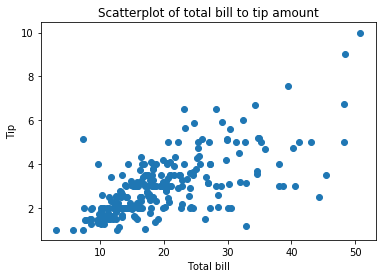

In [25]:
# Is there an association between total bill and tip - a scatterplot
plt.scatter('total_bill', 'tip', data=df)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Scatterplot of total bill to tip amount')

In [26]:
# Create new column indicating tip percentage of total_bill
df['perc'] = round(df.tip/df.total_bill*100 ,2)
df

,total_bill,tip,sex,smoker,day,time,size,perc
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2,22.81
7,26.88,3.12,Male,No,Sun,Dinner,4,11.61
8,15.04,1.96,Male,No,Sun,Dinner,2,13.03
9,14.78,3.23,Male,No,Sun,Dinner,2,21.85


In [27]:
# Describe new variable
df['perc'].describe()

count    244.000000
mean      16.079754
std        6.107020
min        3.560000
25%       12.910000
50%       15.475000
75%       19.147500
max       71.030000
Name: perc, dtype: float64

In [28]:
# What was the bill with the largest tip
df[df.perc == 71.03]

,total_bill,tip,sex,smoker,day,time,size,perc
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03


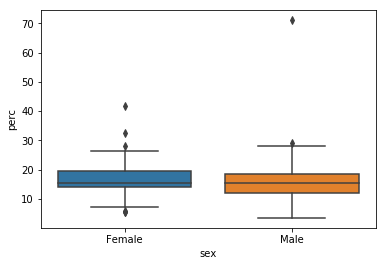

In [29]:
# Is there a difference in percentage tip by gender?
sns.boxplot(x='sex', y='perc', data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


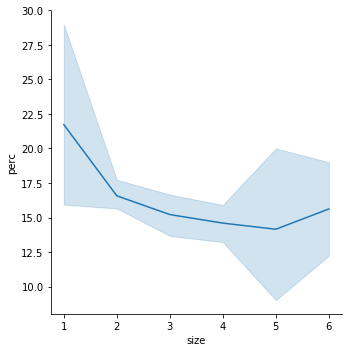

In [30]:
# Is there an association between tip percentage and party size?
sns.relplot(x='size', y='perc', kind="line", data=df)

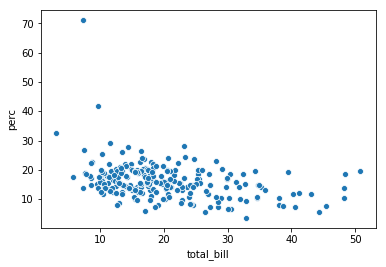

In [31]:
# Is there a relationship between tip percentage and total bill amount?
sns.scatterplot(x="total_bill", y="perc", data=df)

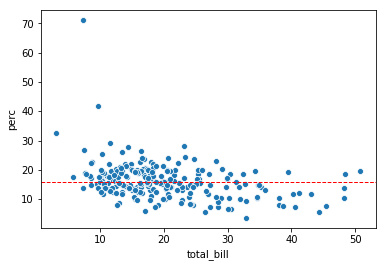

In [32]:
# What section of tips fall below 16%?
# Source: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py
sns.scatterplot(x="total_bill", y="perc", data=df)
plt.axhline(y=16, color="red", ls="--", linewidth=1)

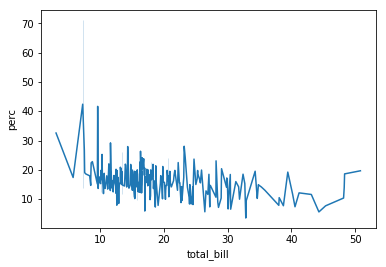

In [33]:
sns.lineplot(x="total_bill", y="perc", data=df)

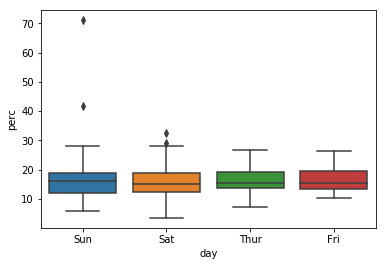

In [34]:
# Is there a relationship between day of week and tip percentage?
sns.boxplot(x="day", y="perc", data=df)

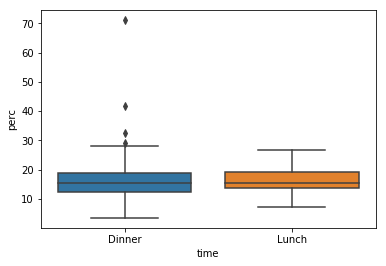

In [35]:
# Is there a relationship between time of meal and tip percentage?
sns.boxplot(x="time", y="perc", data=df)

In [36]:
# What day offers the largest absolute tip amount?
df.groupby('day').sum().tip # source: https://data36.com/pandas-tutorial-2-aggregation-and-grouping/

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [37]:
# What is the smallest total bill that gives at least the average percentage tip (16%)?
df2 = df[df.perc > 16].sort_values(by=['total_bill'])
f"The smallest total bill amount with a percentage tip of more than 16% is {df2.iloc[0,0]}"

'The smallest total bill amount with a percentage tip of more than 16% is 3.07'

In [38]:
df.groupby('day').describe()['tip']

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


The most reliable time for waitstaff to make money from tips is lunch time on a Friday, ideally a group of 1-2 people with a female paying, with total bills starting at as little as 3.07. It would also appear that there is diminishing returns on larger bill amounts. However, more total amount in tips can be made on a Saturday. 

### References
- pandas website
- matplotlib tutorial
- python documentation
- https://statistics.laerd.com/spss-tutorials/pearsons-product-moment-correlation-using-spss-statistics.php
- https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php
- https://thispointer.com/pandas-how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-python/